In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data
Reading the dataset file hosted at: https://raw.githubusercontent.com/sairam-kakarla/DV_Project/main/hotel_booking.csv


In [ ]:
booking_data=pd.read_csv("https://raw.githubusercontent.com/sairam-kakarla/DV_Project/main/hotel_booking.csv")

In [ ]:
booking_data.head()

hotel  is_canceled  ...  phone-number       credit_card
0  Resort Hotel            0  ...  669-792-1661  ************4322
1  Resort Hotel            0  ...  858-637-6955  ************9157
2  Resort Hotel            0  ...  652-885-2745  ************3734
3  Resort Hotel            0  ...  364-656-8427  ************5677
4  Resort Hotel            0  ...  713-226-5883  ************5498

[5 rows x 36 columns]

In [ ]:
booking_data.shape

(119390, 36)

The dimension of the dataset is 119390 x 36.
There are 36 columns and 119390 rows.

In [ ]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

In [ ]:
booking_data.isna().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Children Column

The missing values are present in columns children(4),country(448),agent(16340),company(112593)
Since children has only 4 missing values and the dataset size is 119390 so its better to drop those records.

In [ ]:
booking_data=booking_data.dropna(subset=["children"])

In [ ]:
booking_data.shape

(119386, 36)

In [ ]:
booking_data[["agent","is_canceled","company"]].corr()

agent  is_canceled   company
agent        1.000000    -0.083099  0.350746
is_canceled -0.083099     1.000000 -0.020642
company      0.350746    -0.020642  1.000000

## Agent and Company Column

There is no significant correlation between cancelling, agent and company.
It may be appropriat to drop this columns. Also the representation in irrevalent.

In [ ]:
booking_data=booking_data.drop(["agent","company"],axis=1)

In [ ]:
booking_data["country"].value_counts()

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
CYM        1
DJI        1
NPL        1
BDI        1
NCL        1
Name: country, Length: 177, dtype: int64

## Country Column

Can replace the missing countries with the most frequently recorded country.
It is a comman technique used for categorical data.

In [ ]:
booking_data["country"].fillna(booking_data["country"].mode()[0],inplace=True)

In [ ]:
booking_data.isna().sum(axis=0)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
booking_data.drop(["reservation_status","reservation_status_date","name","email","phone-number","credit_card"],inplace=True,axis=1)

# Data Visualization(Exploration)

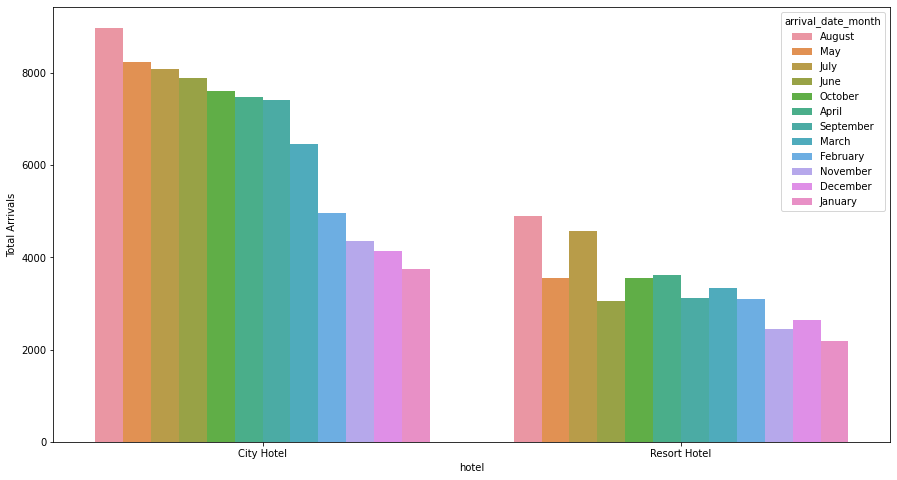

In [ ]:
bookings = booking_data.groupby('hotel')['arrival_date_month'].value_counts().rename('Total Arrivals').reset_index()
bookings.sort_values('Total Arrivals')
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=bookings,x="hotel",y="Total Arrivals",hue="arrival_date_month" ,ax = ax)

## **Inference:**
1. This barchart can be used to find in which month highest number of bookings or more arrivals are happening in city as well as resort hotels.
2. City hotel got a greater number of arrivals than resort hotel in every month.
3. Both Resort hotel and City hotel have highest number of arrivals in august.
4. Both the hotels had lowest number of arrivals in january.

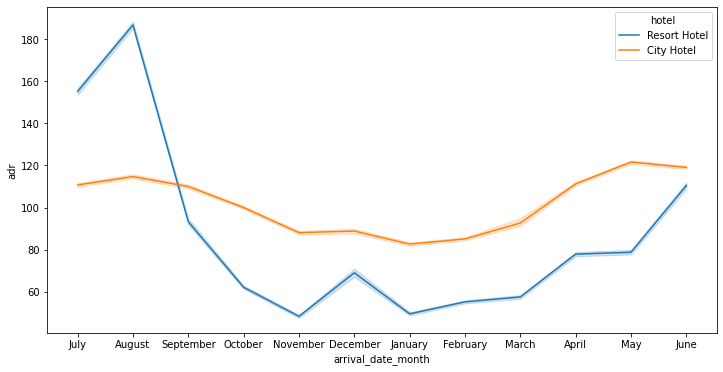

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=booking_data )
plt.show()

## **Inference:**
1) 

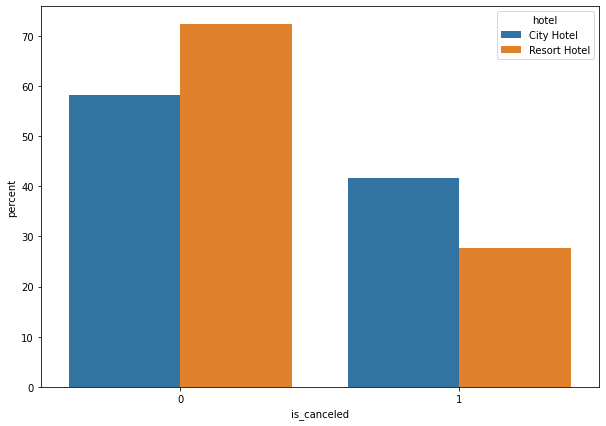

In [ ]:
data = booking_data.groupby(by='hotel')['is_canceled'].value_counts(normalize=True).rename('percent').mul(100).reset_index()  
data.sort_values('percent')
plt.figure(figsize=[10,7])
sns.barplot(data=data, x='is_canceled',y='percent',hue='hotel')
plt.show()

## **Inference:**
1. This barchart shows the analysis on the cancellations of booked tickets.
2. City hotel has got highest number of cancellations than the resort hotel.
3. Nearly 42% of city hotel boookings are cancelled by the guests where as in resort hotel has only 27% of cancellations.


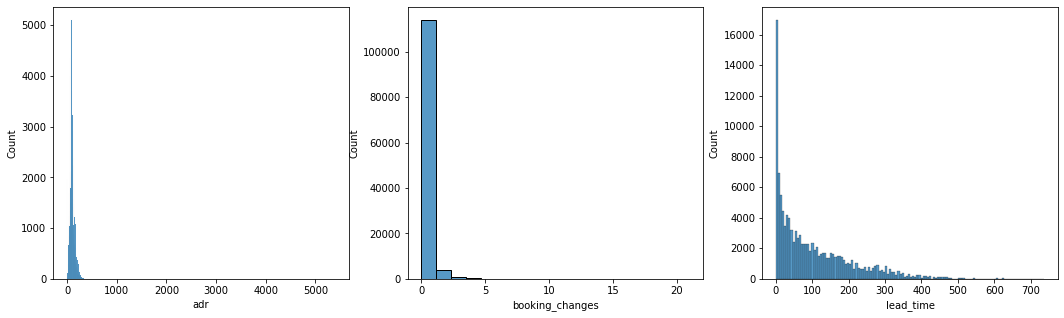

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5));
sns.histplot(booking_data.adr, ax=ax[0]);
sns.histplot(booking_data.booking_changes, ax=ax[1]);
sns.histplot(booking_data.lead_time, ax=ax[2]);


# **Inference:**


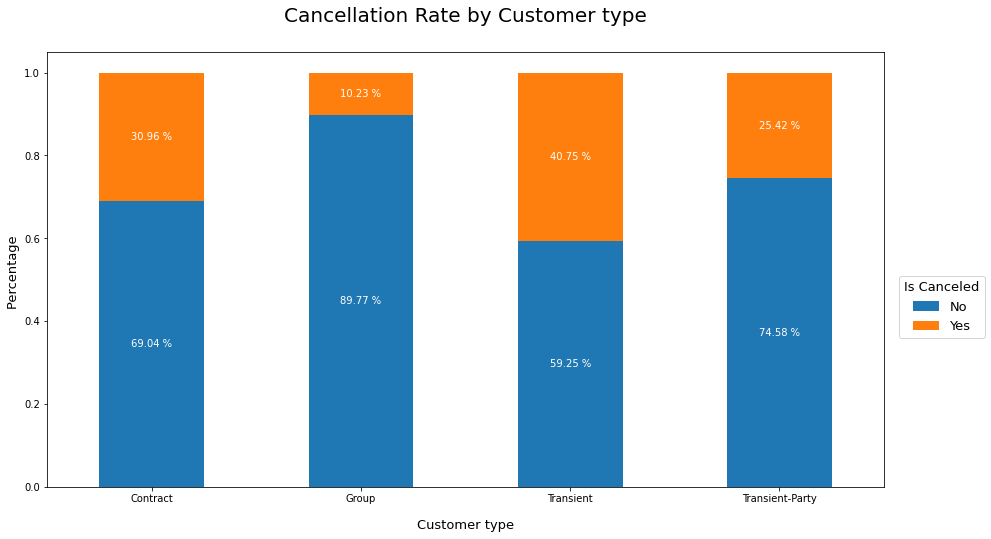

In [ ]:
cust_type = pd.crosstab(booking_data['customer_type'], booking_data['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=13, title_fontsize=13, labels=['No','Yes'])
    
for n in cust_type.patches:
    wt, ht = n.get_width(), n.get_height()
    x, y = n.get_xy() 
    cust_type.text(x+wt/2, 
            y+ht/2, 
            '{:.2f} %'.format(ht*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=10)
    
plt.title('Cancellation Rate by Customer type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Customer type', fontsize=13, labelpad=15)
plt.ylabel('Percentage ', fontsize=13)
plt.show()

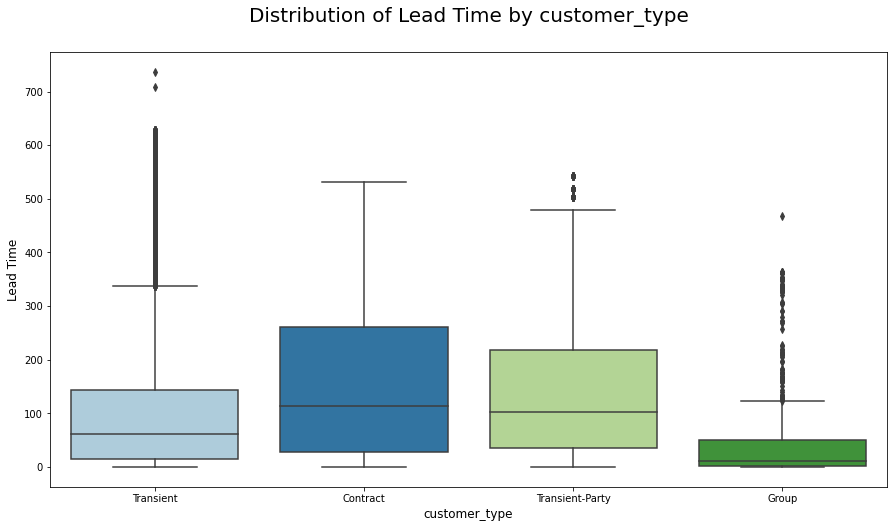

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='customer_type', y='lead_time', data=booking_data, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('customer_type', fontsize=12)
plt.title('Distribution of Lead Time by customer_type', fontsize=20, pad=30)
plt.show()

# **Inference:**
1. The customer type transistent has the highest cancellation rate, reaching 41%. It can be concluded lead time is not having any impact in cancellations. Because contract customers and transistent party has longest lead time than transistent.
2. The customer type group has lowest. 

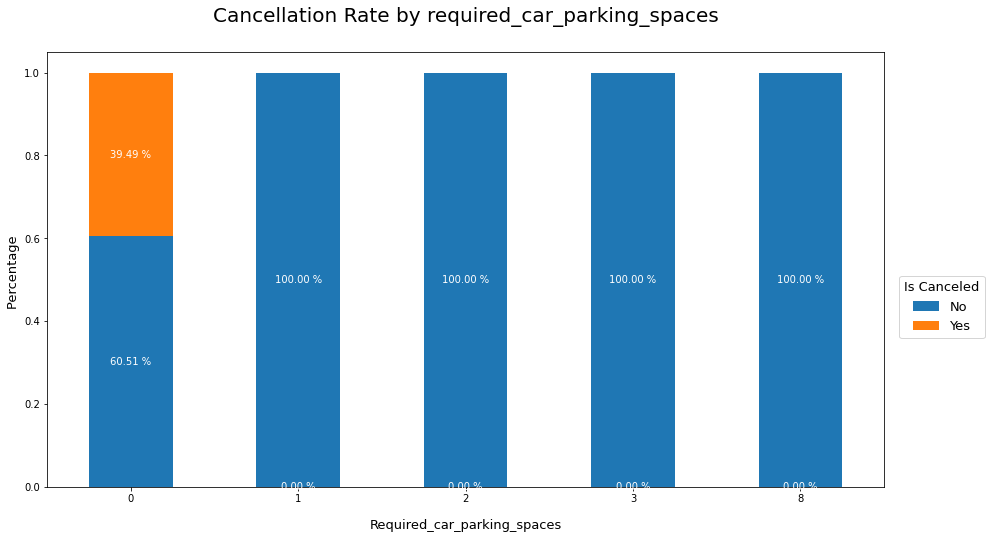

In [ ]:
cust_type = pd.crosstab(booking_data['required_car_parking_spaces'], booking_data['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=13, title_fontsize=13, labels=['No','Yes'])
    
for n in cust_type.patches:
    wt, ht = n.get_width(), n.get_height()
    x, y = n.get_xy() 
    cust_type.text(x+wt/2, 
            y+ht/2, 
            '{:.2f} %'.format(ht*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=10)
    
plt.title('Cancellation Rate by required_car_parking_spaces', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Required_car_parking_spaces', fontsize=13, labelpad=15)
plt.ylabel('Percentage ', fontsize=13)
plt.show()

# **Inference:**
1. The key from above visualization can prove that Required car parking spaces will play a major role in cancellations.
2. Nearly 40% of Customers who didn't request  for the parking spaces are cancelled their bookings.
3. Other customers who requested for parking spaces has no cancellations. 

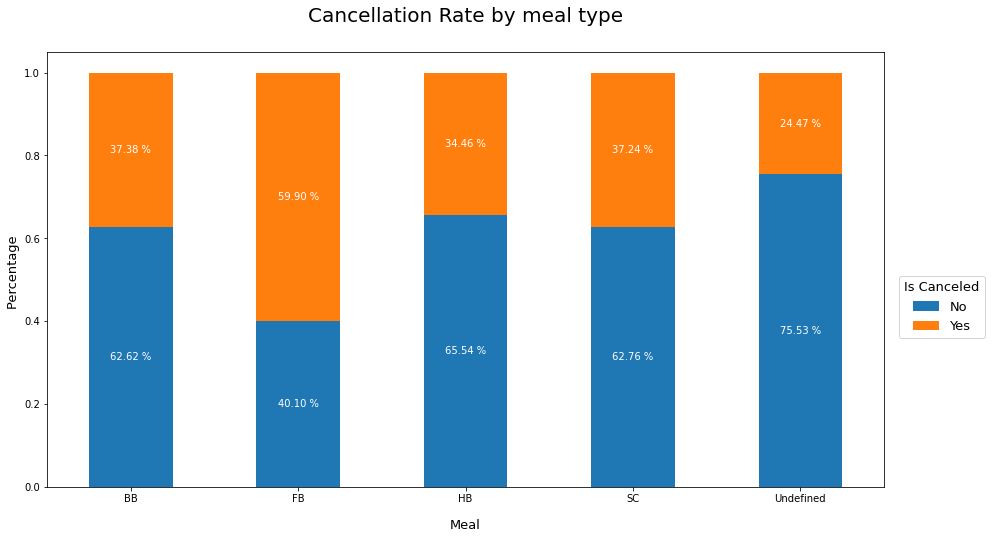

In [ ]:
cust_type = pd.crosstab(booking_data['meal'], booking_data['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=13, title_fontsize=13, labels=['No','Yes'])
    
for n in cust_type.patches:
    wt, ht = n.get_width(), n.get_height()
    x, y = n.get_xy() 
    cust_type.text(x+wt/2, 
            y+ht/2, 
            '{:.2f} %'.format(ht*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=10)
    
plt.title('Cancellation Rate by meal type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Meal', fontsize=13, labelpad=15)
plt.ylabel('Percentage ', fontsize=13)
plt.show()

# **Inference:**
1. Customers who selected full board meals has cancelled most of their reservations.
2. Customers who didn't mentioned any of the types the rate of cancellation rate in not much greater.

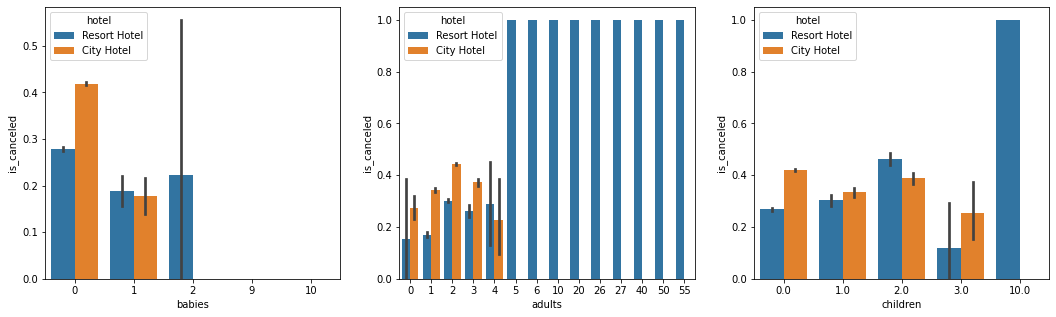

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5));
sns.barplot(data=booking_data, x="babies",y="is_canceled",hue="hotel",ax=ax[0])
sns.barplot(data=booking_data, x="adults",y="is_canceled",hue="hotel",ax=ax[1])
sns.barplot(data=booking_data, x="children",y="is_canceled",hue="hotel",ax=ax[2])

# **Inference:**

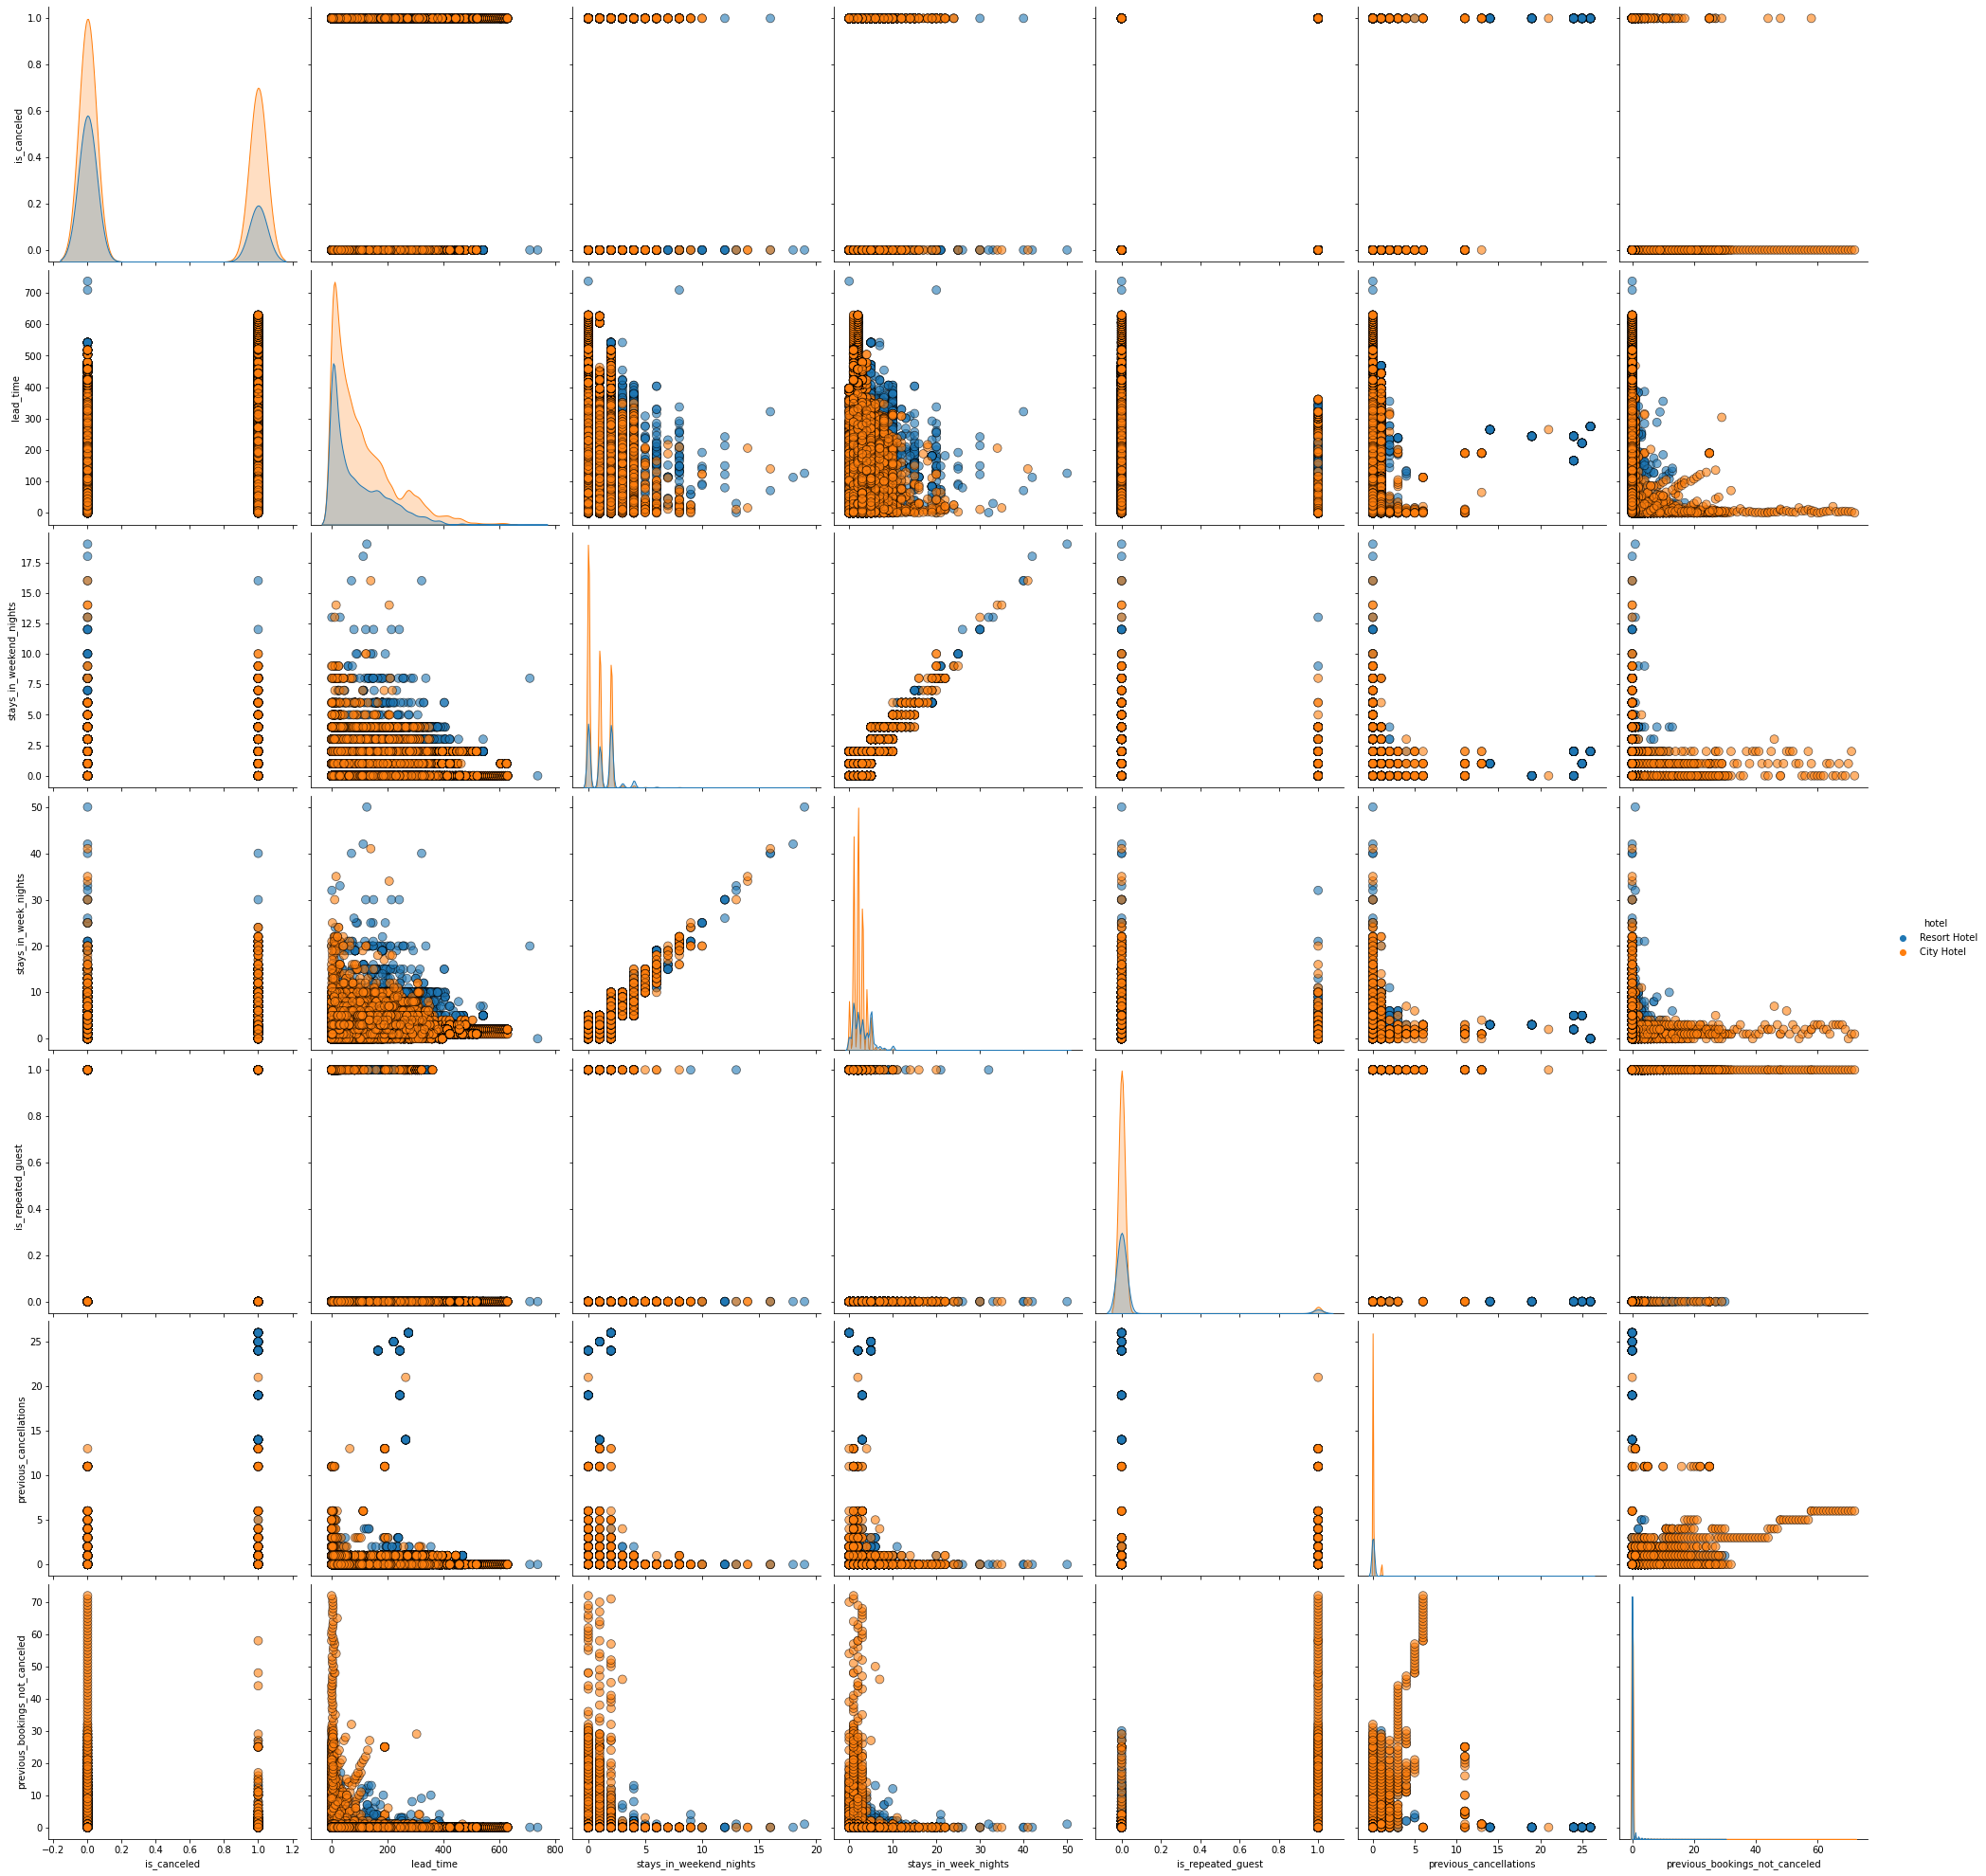

In [ ]:
sns.pairplot(booking_data, 
             vars = ['is_canceled', 'lead_time', 'stays_in_weekend_nights','stays_in_week_nights','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled'], 
             hue = 'hotel', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

# **Inference**:

# Feature Statistics


In [ ]:
booking_data.describe()

is_canceled  ...  total_of_special_requests
count  119386.000000  ...              119386.000000
mean        0.370395  ...                   0.571340
std         0.482913  ...                   0.792798
min         0.000000  ...                   0.000000
25%         0.000000  ...                   0.000000
50%         0.000000  ...                   0.000000
75%         1.000000  ...                   1.000000
max         1.000000  ...                   5.000000

[8 rows x 18 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


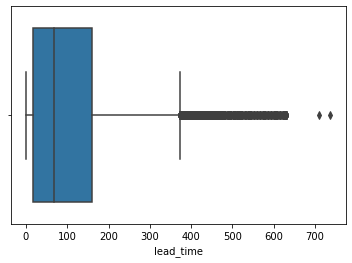

In [ ]:
sns.boxplot(booking_data["lead_time"])

(array([6.1635e+04, 2.4403e+04, 1.6345e+04, 8.6580e+03, 5.2650e+03,
        1.8250e+03, 8.4400e+02, 2.4700e+02, 1.6200e+02, 2.0000e+00]),
 array([  0. ,  73.7, 147.4, 221.1, 294.8, 368.5, 442.2, 515.9, 589.6,
        663.3, 737. ]),
 <a list of 10 Patch objects>)

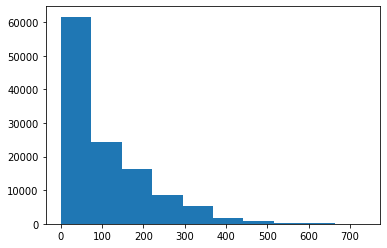

In [ ]:
plt.hist(booking_data["lead_time"])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


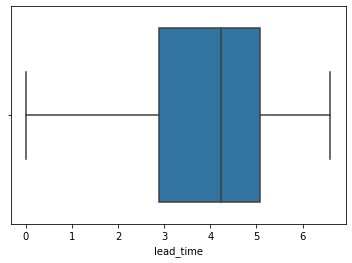

In [ ]:
sns.boxplot(np.log(booking_data["lead_time"]))

In [ ]:
def get_outliers_count(column):
  q1=column.quantile(0.25)
  q3=column.quantile(0.75)
  IQR=q3-q1
  return ((column<(q1-1.5*IQR))|(column>(q3+1.5*IQR))).sum()
def get_outliers_bool(column):
  q1=column.quantile(0.25)
  q3=column.quantile(0.75)
  IQR=q3-q1
  return ((column<(q1-1.5*IQR))|(column>(q3+1.5*IQR)))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Outliers 265


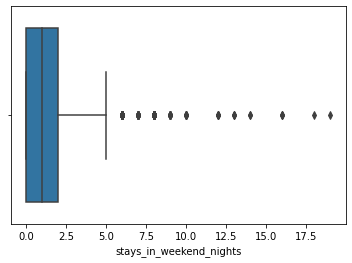

In [ ]:
sns.boxplot(booking_data["stays_in_weekend_nights"])
print("Outliers %d"%get_outliers_count(booking_data["stays_in_weekend_nights"]))

Since only 265 outliers are present it is best to drop them instead of applying any tranformations.

In [ ]:
booking_data=booking_data[~get_outliers_bool(booking_data["stays_in_weekend_nights"])]

Outliers 3089


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


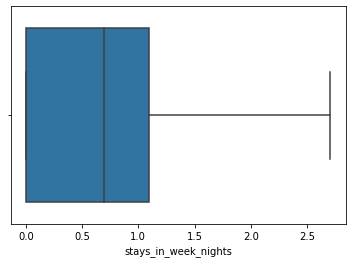

In [ ]:
sns.boxplot(np.log(booking_data["stays_in_week_nights"]))
print("Outliers %d"%get_outliers_count(booking_data["stays_in_week_nights"]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Outliers 29637


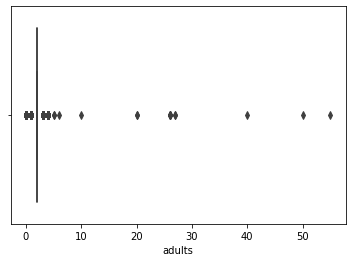

In [ ]:
sns.boxplot((booking_data["adults"]))
print("Outliers %d"%get_outliers_count(booking_data["adults"]))

Outliers 8580


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


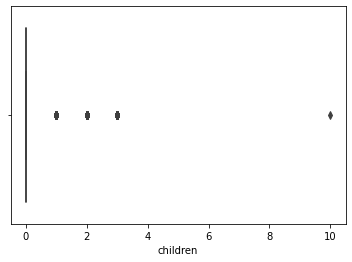

In [ ]:
sns.boxplot(booking_data["children"])
print("Outliers %d"%get_outliers_count(booking_data["children"]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Outliers 917


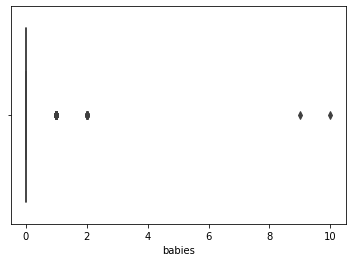

In [ ]:
sns.boxplot(booking_data["babies"])
print("Outliers %d"%get_outliers_count(booking_data["babies"]))

since the outliers count is 917, we are removing the outliers records

In [ ]:
booking_data=booking_data[~get_outliers_bool(booking_data["babies"])]

Outliers 3607


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


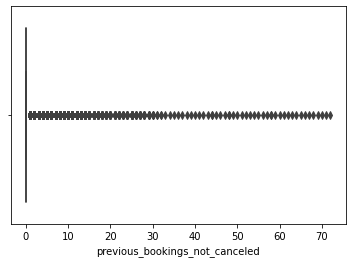

In [ ]:
sns.boxplot(booking_data["previous_bookings_not_canceled"])
print("Outliers %d"%get_outliers_count(booking_data["previous_bookings_not_canceled"]))

Outliers 17435


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


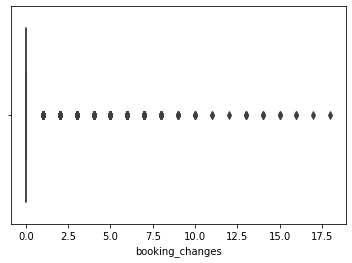

In [ ]:
sns.boxplot(booking_data["booking_changes"])
print("Outliers %d"%get_outliers_count(booking_data["booking_changes"]))

Outliers 3694


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


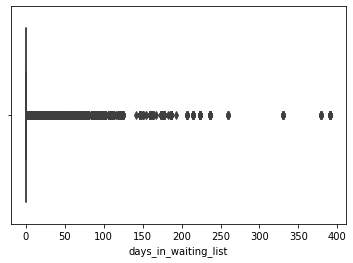

In [ ]:
sns.boxplot(booking_data["days_in_waiting_list"])
print("Outliers %d"%get_outliers_count(booking_data["days_in_waiting_list"]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Outliers 7250


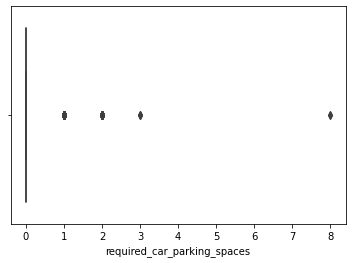

In [ ]:
sns.boxplot(booking_data["required_car_parking_spaces"])
print("Outliers %d"%get_outliers_count(booking_data["required_car_parking_spaces"]))

Outliers 2724


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


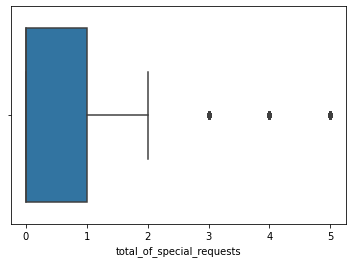

In [ ]:
sns.boxplot(booking_data["total_of_special_requests"])
print("Outliers %d"%get_outliers_count(booking_data["total_of_special_requests"]))

# Models

In [ ]:
booking_data["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Spliting the data into training and testing data

encoding the categorical data to numerical data.

In [ ]:
hotel_le=LabelEncoder()
hotel_le.fit(booking_data["hotel"])
adm_le=LabelEncoder()
adm_le.fit(booking_data["arrival_date_month"])
meal_le=LabelEncoder()
meal_le.fit(booking_data["meal"])
country_le=LabelEncoder()
country_le.fit(booking_data["country"])
market_le=LabelEncoder()
market_le.fit(booking_data["market_segment"])
dc_le=LabelEncoder()
dc_le.fit(booking_data["distribution_channel"])
dt_le=LabelEncoder()
dt_le.fit(booking_data["deposit_type"])
ct_le=LabelEncoder()
ct_le.fit(booking_data["customer_type"])                                                                                    

LabelEncoder()

In [ ]:
le_booking_data=booking_data.copy(deep=True)
le_booking_data["hotel"]=hotel_le.transform(booking_data["hotel"])
le_booking_data["arrival_date_month"]=adm_le.transform(booking_data["arrival_date_month"])
le_booking_data["meal"]=meal_le.transform(booking_data["meal"])
le_booking_data["country"]=country_le.transform(booking_data["country"])
le_booking_data["market_segment"]=market_le.transform(booking_data["market_segment"])
le_booking_data["distribution_channel"]=dc_le.transform(booking_data["distribution_channel"])
le_booking_data["deposit_type"]=dt_le.transform(booking_data["deposit_type"])
le_booking_data["customer_type"]=ct_le.transform(booking_data["customer_type"])

In [ ]:
le_booking_data

hotel  ...  total_of_special_requests
0           1  ...                          0
1           1  ...                          0
2           1  ...                          0
3           1  ...                          0
4           1  ...                          1
...       ...  ...                        ...
119385      0  ...                          0
119386      0  ...                          2
119387      0  ...                          4
119388      0  ...                          0
119389      0  ...                          2

[118204 rows x 28 columns]

In [ ]:
le_booking_data.drop(["reserved_room_type","assigned_room_type"],inplace=True,axis=1)
train_data,test_data=train_test_split(le_booking_data,train_size=0.75,random_state=221)
x_train=train_data.drop("is_canceled",axis=1)
y_train=train_data["is_canceled"]
x_test=test_data.drop("is_canceled",axis=1)
y_test=test_data["is_canceled"]


## Decision Tree

In [ ]:
dt_clf=DecisionTreeClassifier(max_depth=15,criterion="entropy")
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [ ]:
dt_clf.score(x_test,y_test)

0.8499881560691686

In [ ]:
import graphviz
from sklearn import tree
dot_data=tree.export_graphviz(dt_clf,out_file=None,feature_names=x_train.columns,filled=True)

In [ ]:
graph=graphviz.Source(dot_data)
graph

In [ ]:
pd.DataFrame(dt_clf.feature_names_in_,dt_clf.feature_importances_)

0
0.008415                           hotel
0.095863                       lead_time
0.048238               arrival_date_year
0.010317              arrival_date_month
0.025365        arrival_date_week_number
0.012261       arrival_date_day_of_month
0.007398         stays_in_weekend_nights
0.009525            stays_in_week_nights
0.004539                          adults
0.001715                        children
0.000000                          babies
0.004787                            meal
0.068265                         country
0.127856                  market_segment
0.003346            distribution_channel
0.001131               is_repeated_guest
0.034857          previous_cancellations
0.011459  previous_bookings_not_canceled
0.016330                 booking_changes
0.333566                    deposit_type
0.001583            days_in_waiting_list
0.026726                   customer_type
0.036799                             adr
0.051421     required_car_parking_spaces
0.058238       total_of_special_requests

## Random Forest

In [ ]:
rf_clf=RandomForestClassifier(criterion="entropy",random_state=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=100)

In [ ]:
rf_clf.score(x_test,y_test)

0.8886670501844269

In [ ]:
rf_feature_imp=pd.DataFrame({"feature":rf_clf.feature_names_in_,"imp":rf_clf.feature_importances_})
rf_feature_imp.sort_values(by=["imp"],ascending=False,inplace=True)
rf_feature_imp.drop(12,inplace=True,axis=0)

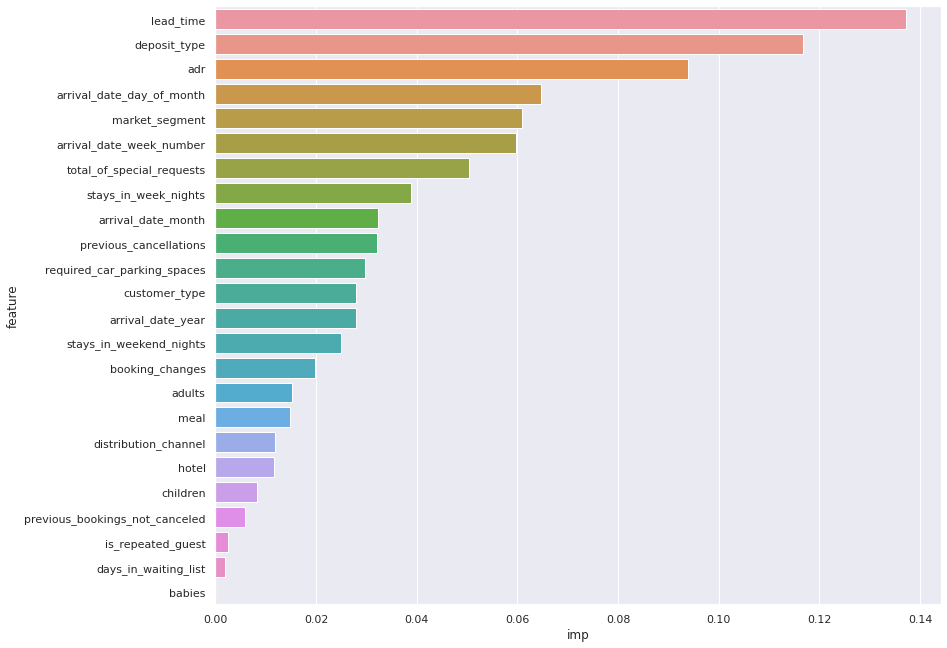

In [ ]:
sns.set(rc={'figure.figsize':(13,11)})
sns.barplot(y=rf_feature_imp["feature"],x=rf_feature_imp["imp"],orient="h")

### One-Hot Encoding

In [ ]:
# Hotel Feature
oh_booking_data=booking_data.copy(deep=True)
one_hot=pd.get_dummies(booking_data["hotel"],drop_first=True)
oh_booking_data.drop("hotel",axis=1,inplace=True)
oh_booking_data=pd.concat([oh_booking_data,one_hot],axis=1)
oh_booking_data.head()


is_canceled  lead_time  ...  total_of_special_requests Resort Hotel
0            0        342  ...                          0            1
1            0        737  ...                          0            1
2            0          7  ...                          0            1
3            0         13  ...                          0            1
4            0         14  ...                          1            1

[5 rows x 28 columns]

In [ ]:
# Meal Feature
one_hot=pd.get_dummies(booking_data["meal"],drop_first=True)
oh_booking_data.drop("meal",axis=1,inplace=True)
oh_booking_data=pd.concat([oh_booking_data,one_hot],axis=1)


In [ ]:
# market_segment Feature
one_hot=pd.get_dummies(booking_data["market_segment"],drop_first=True)
oh_booking_data.drop("market_segment",axis=1,inplace=True)
oh_booking_data=pd.concat([oh_booking_data,one_hot],axis=1)


In [ ]:
# Distribution_channel Feature
one_hot=pd.get_dummies(booking_data["distribution_channel"],drop_first=True)
oh_booking_data.drop("distribution_channel",axis=1,inplace=True)
oh_booking_data=pd.concat([oh_booking_data,one_hot],axis=1)


In [ ]:
# Deposit Feature
one_hot=pd.get_dummies(booking_data["deposit_type"],drop_first=True)
oh_booking_data.drop("deposit_type",axis=1,inplace=True)
oh_booking_data=pd.concat([oh_booking_data,one_hot],axis=1)


In [ ]:
# Customer Type Feature
one_hot=pd.get_dummies(booking_data["customer_type"],drop_first=True)
oh_booking_data.drop("customer_type",axis=1,inplace=True)
oh_booking_data=pd.concat([oh_booking_data,one_hot],axis=1)

In [ ]:

oh_booking_data.drop('country',inplace=True,axis=1)

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
oh_train_data,oh_test_data=train_test_split(oh_booking_data,train_size=0.75,random_state=221)
oh_x_train=oh_train_data.drop("is_canceled",axis=1)
oh_y_train=oh_train_data["is_canceled"]
oh_x_test=oh_test_data.drop("is_canceled",axis=1)
oh_y_test=oh_test_data["is_canceled"]

In [ ]:
adb_clf=AdaBoostClassifier(n_estimators=10,learning_rate=0.001,random_state=0)
adb_clf.fit(oh_x_train,oh_y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=10, random_state=0)

In [ ]:
adb_clf.score(oh_x_test,oh_y_test)

0.749619302223275

## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf=GradientBoostingClassifier(n_estimators=10,learning_rate=0.001,random_state=0)
gb_clf.fit(oh_x_train,oh_y_train)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=10, random_state=0)

In [ ]:
gb_clf.score(x_test,y_test)

0.6269500186118913

# Comparision of Various Models


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [ ]:
dt_precision,dt_recall,_=precision_recall_curve(y_test,dt_clf.predict_proba(x_test)[:,1])
rf_precision,rf_recall,_=precision_recall_curve(y_test,rf_clf.predict_proba(x_test)[:,1])
adb_precision,adb_recall,_=precision_recall_curve(oh_y_test,adb_clf.predict_proba(oh_x_test)[:,1])
gb_precision,gb_recall,_=precision_recall_curve(oh_y_test,gb_clf.predict_proba(oh_x_test)[:,1])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Complementary
- Corporate
- Direct
- FB
- GDS
- ...
Feature names seen at fit time, yet now missing:
- country
- customer_type
- deposit_type
- distribution_channel
- hotel
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

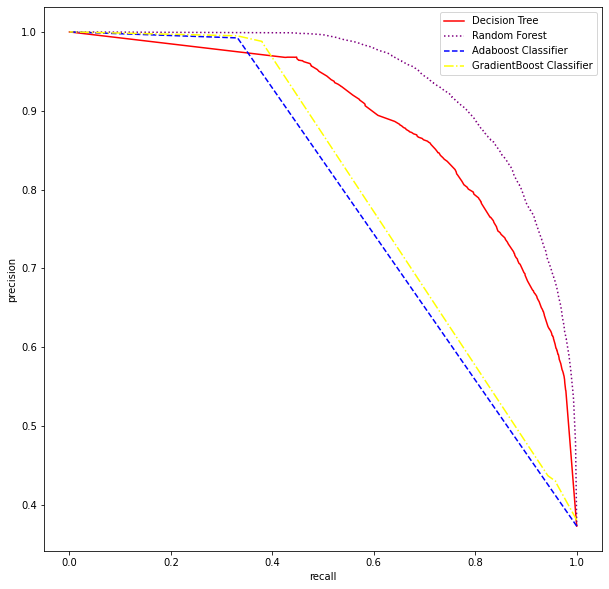

In [ ]:
plt.figure(figsize=[10,10])
plt.plot(dt_recall,dt_precision,color="red",linestyle="solid",label="Decision Tree")
plt.plot(rf_recall,rf_precision,color="purple",linestyle="dotted",label="Random Forest")
plt.plot(adb_recall,adb_precision,color="blue",linestyle="dashed",label="Adaboost Classifier")
plt.plot(gb_recall,gb_precision,color="yellow",linestyle="dashdot",label="GradientBoost Classifier")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()

In [ ]:
dt_f1, dt_auc = f1_score(y_test, dt_clf.predict(x_test)), auc(dt_recall, dt_precision)
rf_f1, rf_auc = f1_score(y_test, rf_clf.predict(x_test)), auc(rf_recall, rf_precision)
adb_f1, adb_auc = f1_score(oh_y_test, adb_clf.predict(oh_x_test)), auc(adb_recall, adb_precision)
gb_f1, gb_auc = f1_score(oh_y_test, gb_clf.predict(oh_x_test)), auc(gb_recall, gb_precision)
print("Decision Tree F1-Score [%f] AUC [%f]"%(dt_f1,dt_auc))
print("Random Forest F1-Score [%f] AUC [%f]"%(rf_f1,rf_auc))
print("AdaBoost Classifier F1-Score [%f] AUC [%f]"%(adb_f1,adb_auc))
print("Gradient Boost Classifier F1-Score [%f] AUC [%f]"%(gb_f1,gb_auc))

Decision Tree F1-Score [0.791300] AUC [0.887514]
Random Forest F1-Score [0.843785] AUC [0.939082]
AdaBoost Classifier F1-Score [0.496838] AUC [0.786597]
Gradient Boost Classifier F1-Score [0.000000] AUC [0.803123]


In [ ]:
booking_data["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)